In [872]:
import pandas as pd
df = pd.read_csv('german_credit_data.csv')
df.head()

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car

In [873]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [874]:
df.describe()

Unnamed: 0          Age          Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
mean    499.500000    35.546000     1.904000    3271.258000    20.903000
std     288.819436    11.375469     0.653614    2822.736876    12.058814
min       0.000000    19.000000     0.000000     250.000000     4.000000
25%     249.750000    27.000000     2.000000    1365.500000    12.000000
50%     499.500000    33.000000     2.000000    2319.500000    18.000000
75%     749.250000    42.000000     2.000000    3972.250000    24.000000
max     999.000000    75.000000     3.000000   18424.000000    72.000000

In [875]:
df.drop(['Unnamed: 0','Checking account','Sex'] , axis=1 , inplace=True)

In [876]:
df.dropna(inplace=True)

In [877]:
df.head()

Age  Job Housing Saving accounts  Credit amount  Duration  \
1   22    2     own          little           5951        48   
2   49    1     own          little           2096        12   
3   45    2    free          little           7882        42   
4   53    2    free          little           4870        24   
6   53    2     own      quite rich           2835        24   

               Purpose  
1             radio/TV  
2            education  
3  furniture/equipment  
4                  car  
6  furniture/equipment

In [878]:
df.head()

Age  Job Housing Saving accounts  Credit amount  Duration  \
1   22    2     own          little           5951        48   
2   49    1     own          little           2096        12   
3   45    2    free          little           7882        42   
4   53    2    free          little           4870        24   
6   53    2     own      quite rich           2835        24   

               Purpose  
1             radio/TV  
2            education  
3  furniture/equipment  
4                  car  
6  furniture/equipment

In [879]:
df['Saving accounts'].fillna(method='ffill' , inplace=True)

In [880]:
df.isnull().sum()

Age                0
Job                0
Housing            0
Saving accounts    0
Credit amount      0
Duration           0
Purpose            0
dtype: int64

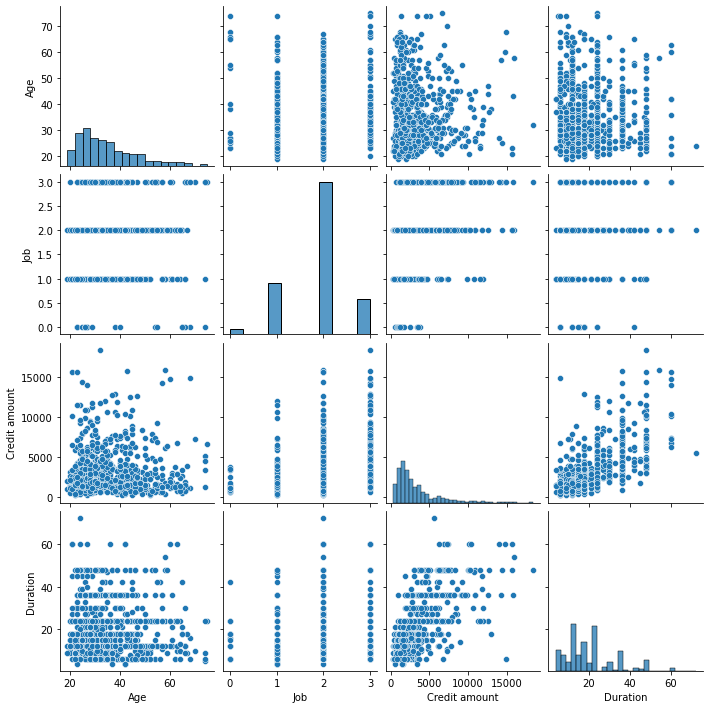

In [881]:
import seaborn as sns
sns.pairplot(df)

In [882]:
df.head()

Age  Job Housing Saving accounts  Credit amount  Duration  \
1   22    2     own          little           5951        48   
2   49    1     own          little           2096        12   
3   45    2    free          little           7882        42   
4   53    2    free          little           4870        24   
6   53    2     own      quite rich           2835        24   

               Purpose  
1             radio/TV  
2            education  
3  furniture/equipment  
4                  car  
6  furniture/equipment

C:\Users\CS-L2-PC10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit amount'>

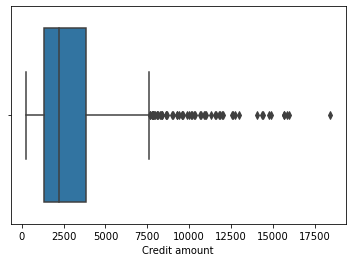

In [883]:
sns.boxplot(df['Credit amount'])

In [884]:
df['Credit amount'].skew()

2.144908365271921

In [885]:
q1=df['Credit amount'].quantile(0.25)

In [886]:
q3=df['Credit amount'].quantile(0.75)

In [887]:
iqr=q3-q1

In [888]:
ll=q1-1.5*iqr

In [889]:
ul=q3+1.5*iqr

In [890]:
import numpy as np
df['Credit amount'] = np.where(df['Credit amount']>ul,ul,
                              np.where(df['Credit amount']<ll,ll,
                                      df['Credit amount']))

C:\Users\CS-L2-PC10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit amount'>

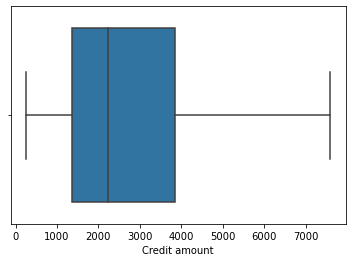

In [891]:
sns.boxplot(df['Credit amount'])

C:\Users\CS-L2-PC10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

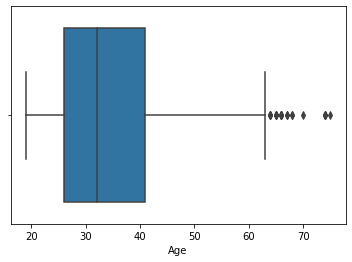

In [892]:
sns.boxplot(df['Age'])

In [893]:
df['Age'].skew()

1.0825614288405228

In [894]:
q1=df['Age'].quantile(0.25)

In [895]:
q3=df['Age'].quantile(0.75)

In [896]:
iqr=q3-q1

In [897]:
ll=q1-1.5*iqr

In [898]:
ul=q3+1.5*iqr

In [899]:
import numpy as np
df['Age'] = np.where(df['Age']>ul,ul,
                              np.where(df['Age']<ll,ll,
                                      df['Age']))

C:\Users\CS-L2-PC10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

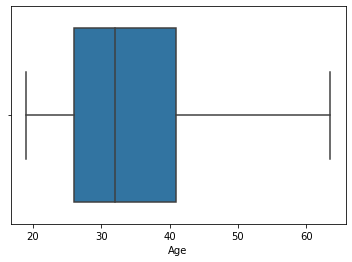

In [900]:
sns.boxplot(df['Age'])

In [901]:
x = df.drop(columns=['Credit amount'])
x

Age  Job Housing Saving accounts  Duration              Purpose
1    22.0    2     own          little        48             radio/TV
2    49.0    1     own          little        12            education
3    45.0    2    free          little        42  furniture/equipment
4    53.0    2    free          little        24                  car
6    53.0    2     own      quite rich        24  furniture/equipment
..    ...  ...     ...             ...       ...                  ...
995  31.0    1     own          little        12  furniture/equipment
996  40.0    3     own          little        30                  car
997  38.0    2     own          little        12             radio/TV
998  23.0    2    free          little        45             radio/TV
999  27.0    2     own        moderate        45                  car

[817 rows x 6 columns]

In [902]:
y=df['Credit amount']
y

1      5951.0
2      2096.0
3      7592.5
4      4870.0
6      2835.0
        ...  
995    1736.0
996    3857.0
997     804.0
998    1845.0
999    4576.0
Name: Credit amount, Length: 817, dtype: float64

In [903]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.2,
                                                random_state=42)

In [904]:
x_train

Age  Job Housing Saving accounts  Duration              Purpose
544  61.0    1     own          little        12                  car
665  27.0    3     own          little        24      vacation/others
359  23.0    2    rent          little        30  furniture/equipment
910  34.0    2     own          little        36             radio/TV
100  41.0    1    rent        moderate        24                  car
..    ...  ...     ...             ...       ...                  ...
88   30.0    3     own        moderate        18                  car
134  21.0    2     own        moderate        60             radio/TV
330  63.5    3    free          little        24                  car
526  31.0    2     own        moderate        15            education
129  29.0    2     own          little        12                  car

[653 rows x 6 columns]

In [905]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 653 entries, 544 to 129
Series name: Credit amount
Non-Null Count  Dtype  
--------------  -----  
653 non-null    float64
dtypes: float64(1)
memory usage: 10.2 KB


In [906]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler

In [907]:
trf1 = ColumnTransformer( transformers=[
    ('a',OneHotEncoder(),[5])
],remainder='passthrough')
trf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('a',
                                 OneHotEncoder(dtype=<class 'numpy.int32'>,
                                               handle_unknown='ignore',
                                               sparse=False),
                                 [5])])

In [908]:
trf2 = ColumnTransformer( transformers=[
    ('c',OrdinalEncoder(categories=[['own', 'free', 'rent']]) , [2]),
    ('b',OrdinalEncoder(categories=[['little', 'moderate', 'quite rich', 'rich']]) , [3])
],remainder='passthrough')
trf2

ColumnTransformer(remainder='passthrough',
                  transformers=[('c',
                                 OrdinalEncoder(categories=[['own', 'free',
                                                             'rent']]),
                                 [2]),
                                ('b',
                                 OrdinalEncoder(categories=[['little',
                                                             'moderate',
                                                             'quite rich',
                                                             'rich']]),
                                 [3])])

In [909]:
from sklearn.feature_selection import SelectKBest,chi2
#Feature selection
trf3 = SelectKBest(score_func=chi2,k=4)

In [910]:
# from sklearn.linear_model import LogisticRegression
# trf4 = LogisticRegression()

In [911]:
from sklearn.linear_model import LinearRegression
trf4 =LinearRegression()
trf4

LinearRegression()

In [912]:
from sklearn.pipeline import Pipeline,make_pipeline
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4)
])
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('a',
                                                  OneHotEncoder(dtype=<class 'numpy.int32'>,
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [5])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('c',
                                                  OrdinalEncoder(categories=[['own',
                                                                              'free',
                                                                              'rent']]),
                                                  [2]),
                                                 ('b',
                             

In [913]:
# pipe.fit(x_train,y_train)
pipe.fit(x_train,y_train)

ValueError: Found unknown categories [0, 1] in column 0 during fit